# Lezione 04


Si consideri un sistema di $N=108$ particelle interagenti mediante un potenziale Lennard-Jones $v_{ij} = 4 \epsilon \bigl[  \bigl( \frac{\sigma}{r_{ij}} \bigr)^{12} - \bigl( \frac{\sigma}{r_{ij}} \bigr)^6 \bigr]$.
Utilizzando un codice di dinamica molecolare si vuole simulare un sistema di atomi di Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e uno di atomi di Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) negli stati solido, liquido e gassoso. In tutti i casi presi in esame viene stimato il valore delle seguenti osservabili all'equilibrio: energia potenziale per particella $U/N$, energia cinetica per particella $K/N$, energia totale per particella $E/N$, temperatura $T$ e pressione $P$. 


Per equilibrare il sistema ho introdotto nel codice la possibilità di leggere l'ultima e penultima configurazione del sistema ottenute in una simulazione precedente e salvate nei file config.final e old.final. Allora ho eseguito più simulazioni di cui la prima legge la configurazione iniziale dal file config.0 mentre le successive costruiscono le configurazioni per il primo step da old.final e config.final. Per tutte queste simulazioni osservo l'andmento della temperatura. Una volta che questa oscilla attorno al valore fissato in input.dat il sistema ha equilibrato ed è possibile raccogliere dati per stimare le osservabili considerate. 


## Stato solido 

### Equilibrazione
Di seguito l'andemnto della temperatura media di ciasucn blocco con il numero di blocchi per 7 simulazioni consecutive:



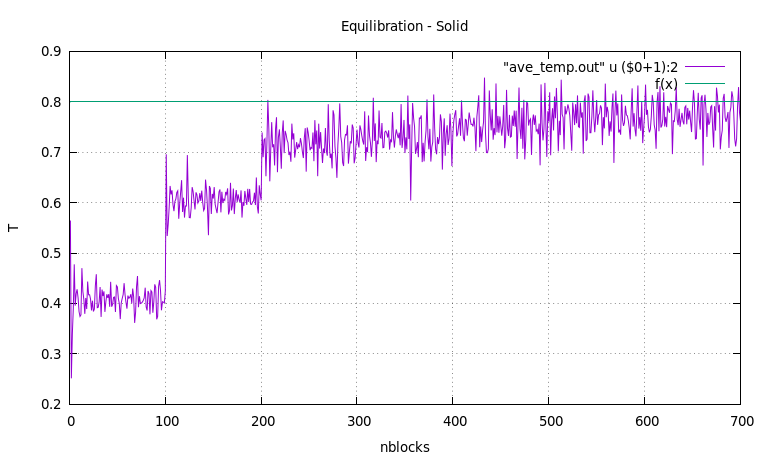

In [1]:
from IPython.display import Image
i = Image(filename = 'eq_solid.png') 
i

### Osservabili

Una volta equilibrato il sistema eseguo un'ulteriore simulazione in cui raccolgo i dati per stimare le osservabili prese in esame.

####  K/N

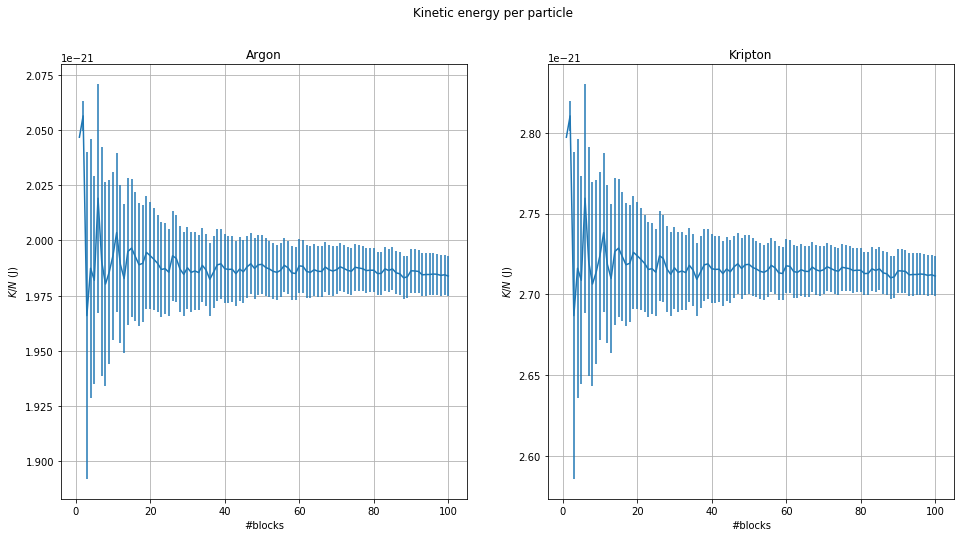

In [5]:
import numpy as np
import matplotlib.pyplot as plt

kb = 1.380649*(10**(-23))
amu = 1.66054*(10**(-27))

sigAr = 0.34*(10**(-9))
epsAr = 120*kb
mAr = 39.948*amu

sigKr = 0.364*(10**(-9))
epsKr = 164*kb
mKr = 83.798*amu

#Kinetic energy

Nblocks, K, errK = np.loadtxt("solidK.out", usecols=(0,2,3), unpack=True)

K_Ar = K*epsAr
errK_Ar = errK*epsAr

K_Kr = K*epsKr
errK_Kr = errK*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,K_Ar, yerr=errK_Ar)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,K_Kr, yerr=errK_Kr)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Kinetic energy per particle')
plt.show()

#### U/N

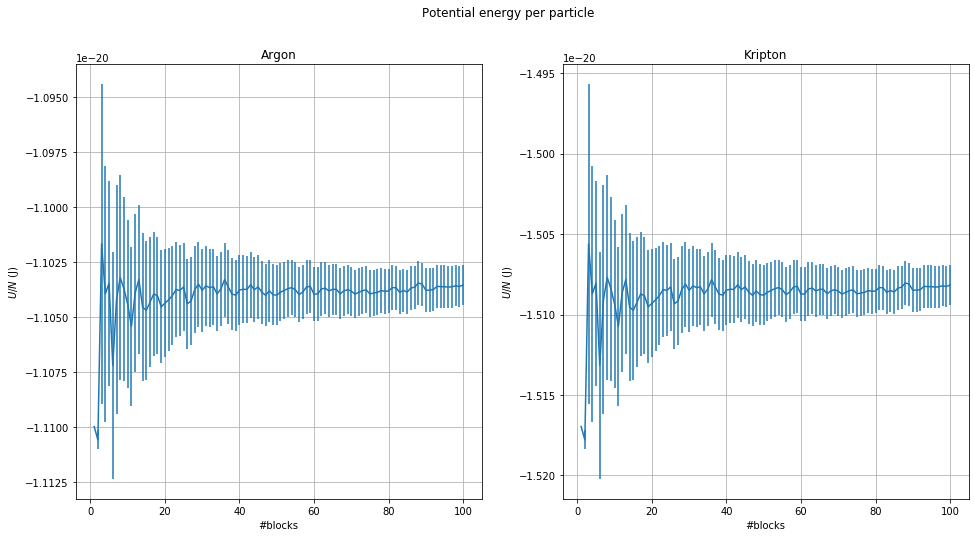

In [7]:
#Potential energy

Nblocks, U, errU = np.loadtxt("solidU.out", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### E/N

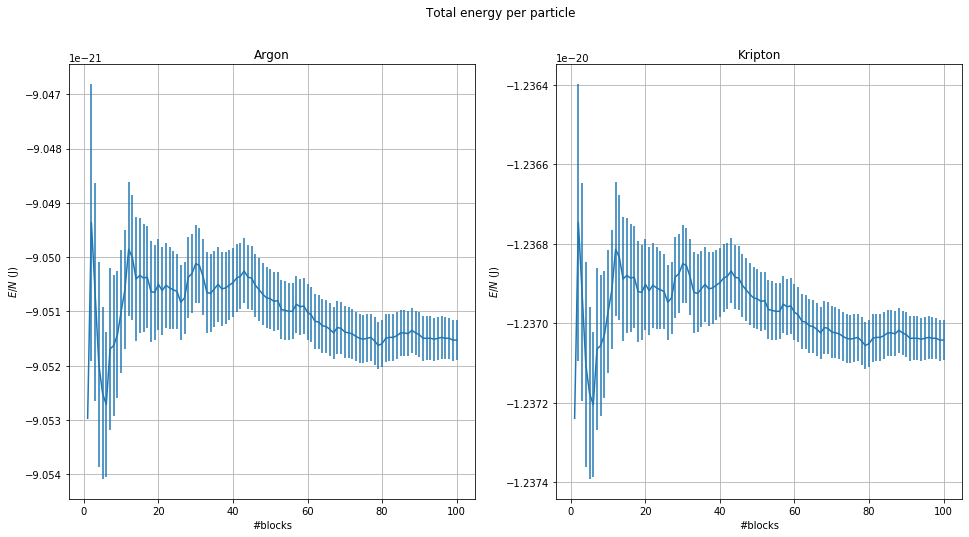

In [8]:
#Total energy

Nblocks, E, errE = np.loadtxt("solidE.out", usecols=(0,2,3), unpack=True)

E_Ar = E*epsAr
errE_Ar = errE*epsAr

E_Kr = E*epsKr
errE_Kr = errE*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,E_Ar, yerr=errE_Ar)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,E_Kr, yerr=errE_Kr)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Total energy per particle')
plt.show()

#### T

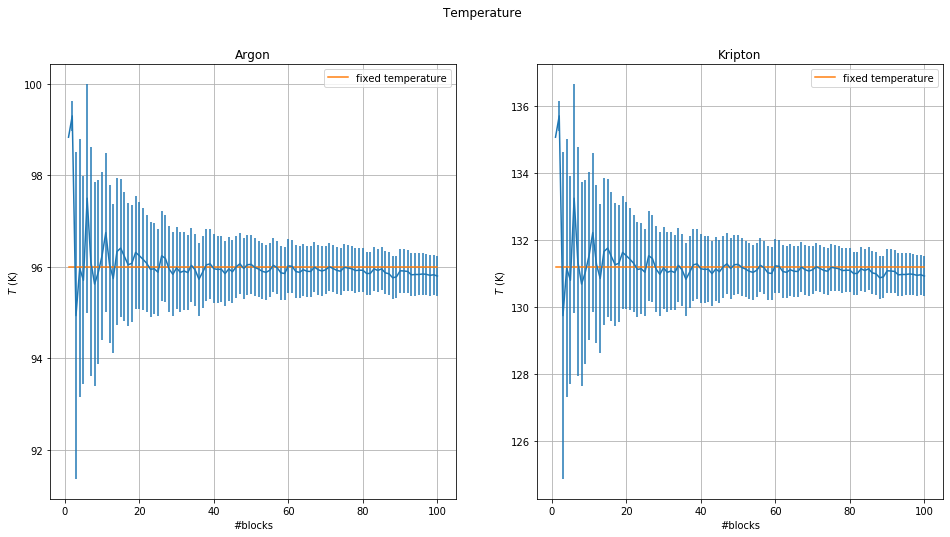

In [9]:
#Temperature

Nblocks, T, errT = np.loadtxt("solidT.out", usecols=(0,2,3), unpack=True)

T_Ar = T*epsAr/kb
errT_Ar = errT*epsAr/kb

T_Kr = T*epsKr/kb
errT_Kr = errT*epsKr/kb

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,T_Ar, yerr=errT_Ar)
plt.plot(Nblocks, np.array([0.8*epsAr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,T_Kr, yerr=errT_Kr)
plt.plot(Nblocks, np.array([0.8*epsKr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Temperature')
plt.show()

#### P

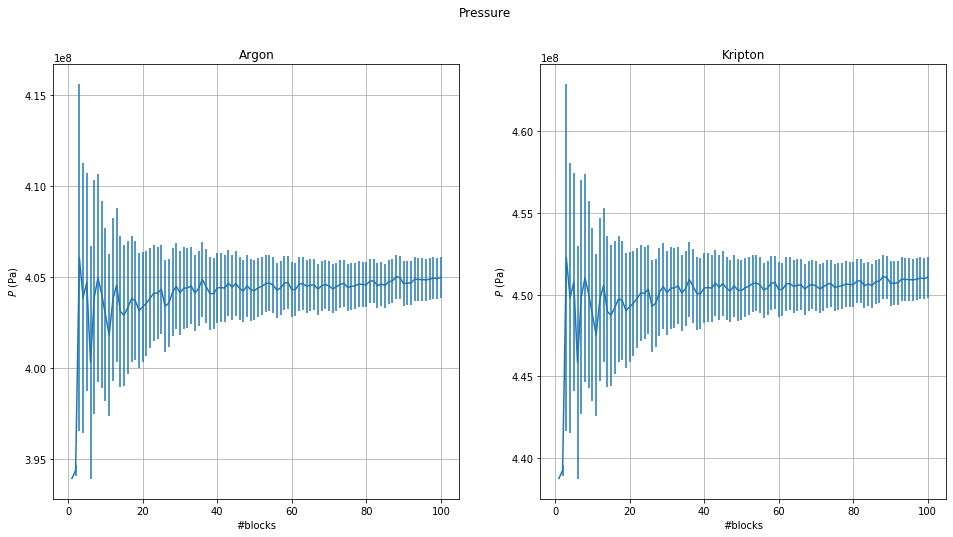

In [11]:
#Pressure

Nblocks, P, errP = np.loadtxt("solidP.out", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()

## Stato liquido
### Equilibrazione

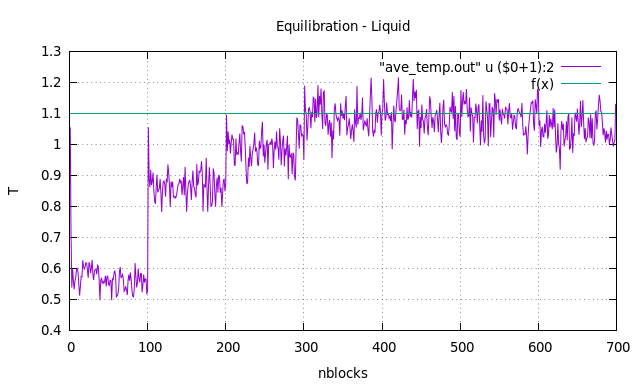

In [12]:
from IPython.display import Image
i = Image(filename = 'eq_liquid.png') 
i

Eseguendo altre quattro simulazioni ottengo stime di temperatura più vicine a quella prestabilita. 
Di seguito le stime ottenute con l'ultima simulazione.
### Osservabili
#### E/K

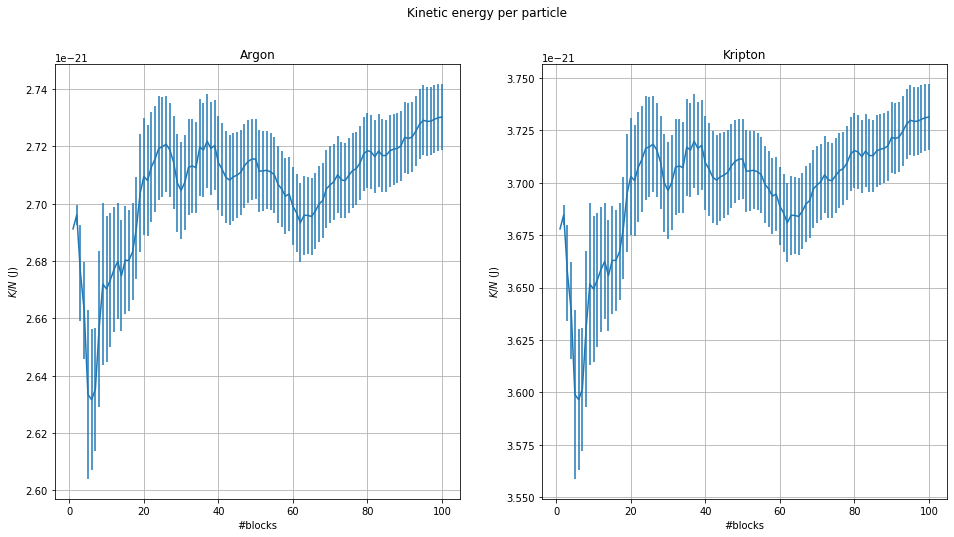

In [13]:
#Kinetic energy

Nblocks, K, errK = np.loadtxt("liquidK.out", usecols=(0,2,3), unpack=True)
#Nblocks, K, errK = np.loadtxt("ave_ekin.out", usecols=(0,2,3), unpack=True)

K_Ar = K*epsAr
errK_Ar = errK*epsAr

K_Kr = K*epsKr
errK_Kr = errK*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,K_Ar, yerr=errK_Ar)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,K_Kr, yerr=errK_Kr)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Kinetic energy per particle')
plt.show()

#### U/N

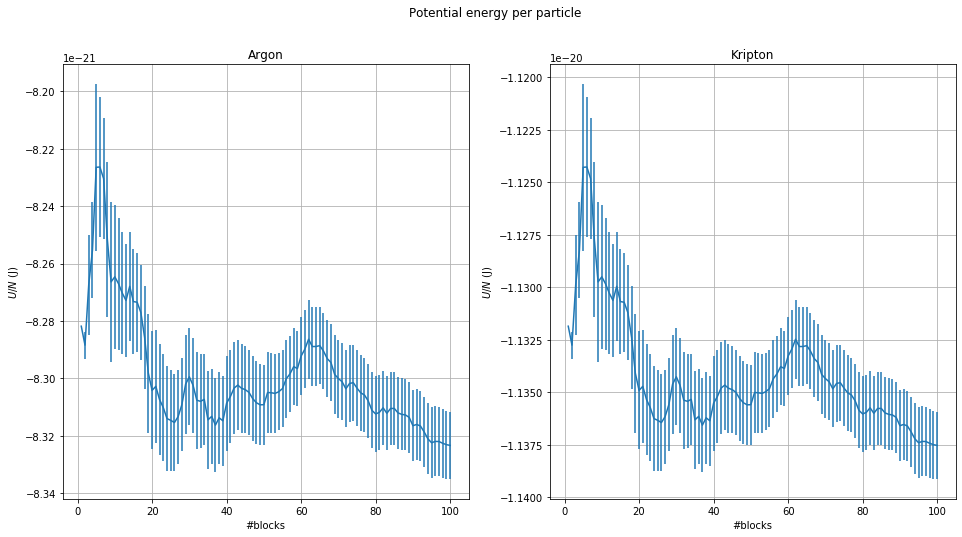

In [14]:
#Potential energy

Nblocks, U, errU = np.loadtxt("liquidU.out", usecols=(0,2,3), unpack=True)
#Nblocks, U, errU = np.loadtxt("ave_epot.out", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### E/N

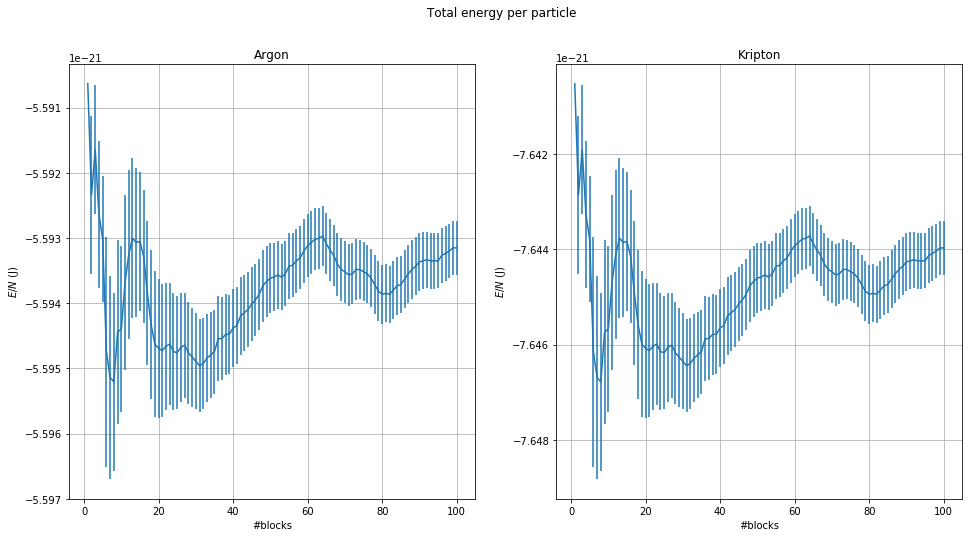

In [15]:
#Total energy

Nblocks, E, errE = np.loadtxt("liquidE.out", usecols=(0,2,3), unpack=True)
#Nblocks, E, errE = np.loadtxt("ave_etot.out", usecols=(0,2,3), unpack=True)

E_Ar = E*epsAr
errE_Ar = errE*epsAr

E_Kr = E*epsKr
errE_Kr = errE*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,E_Ar, yerr=errE_Ar)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,E_Kr, yerr=errE_Kr)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Total energy per particle')
plt.show()

#### T

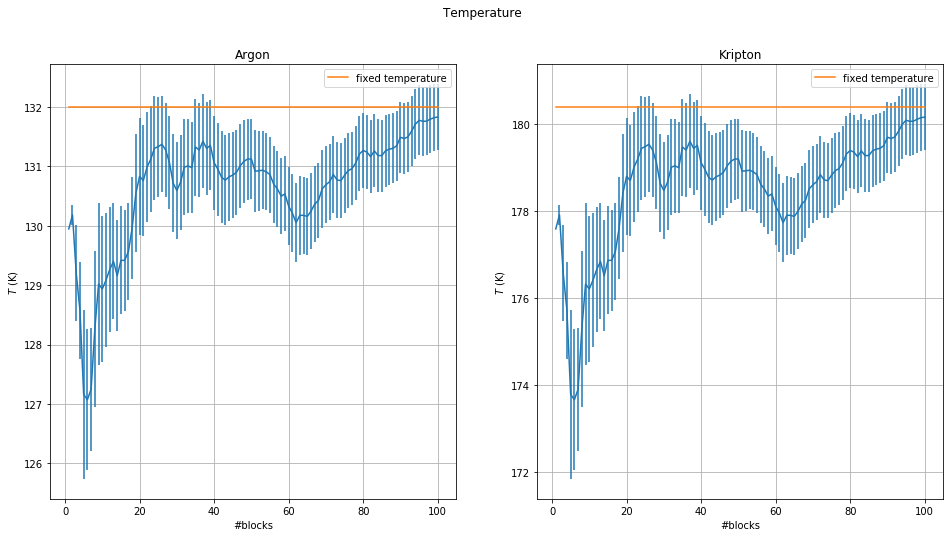

In [16]:
#Temperature

Nblocks, T, errT = np.loadtxt("liquidT.out", usecols=(0,2,3), unpack=True)
#Nblocks, T, errT = np.loadtxt("ave_temp.out", usecols=(0,2,3), unpack=True)

T_Ar = T*epsAr/kb
errT_Ar = errT*epsAr/kb

T_Kr = T*epsKr/kb
errT_Kr = errT*epsKr/kb

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,T_Ar, yerr=errT_Ar)
plt.plot(Nblocks, np.array([1.1*epsAr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,T_Kr, yerr=errT_Kr)
plt.plot(Nblocks, np.array([1.1*epsKr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Temperature')
plt.show()

#### P

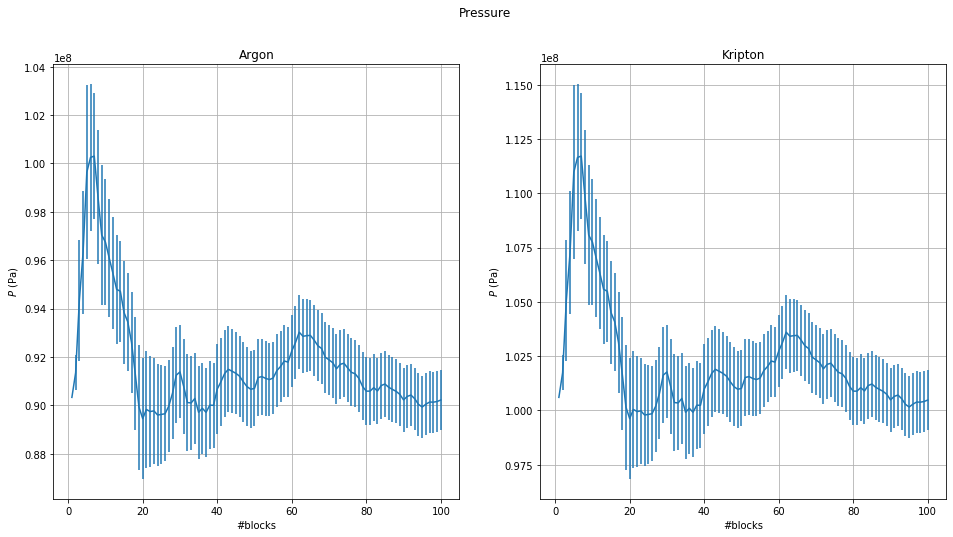

In [17]:
#Pressure

Nblocks, P, errP = np.loadtxt("liquidP.out", usecols=(0,2,3), unpack=True)
#Nblocks, P, errP = np.loadtxt("ave_pres.out", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()

## Stato gassoso
### Equilibrazione

In questo caso ho utilizzato sette simulazioni per equilibrare e una per calcolare stimare le osservabili. 

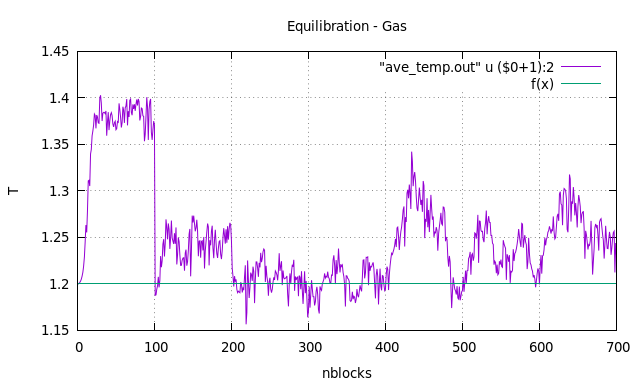

In [18]:
from IPython.display import Image
i = Image(filename = 'eq_gas.png') 
i

### Osservabili
#### K/N


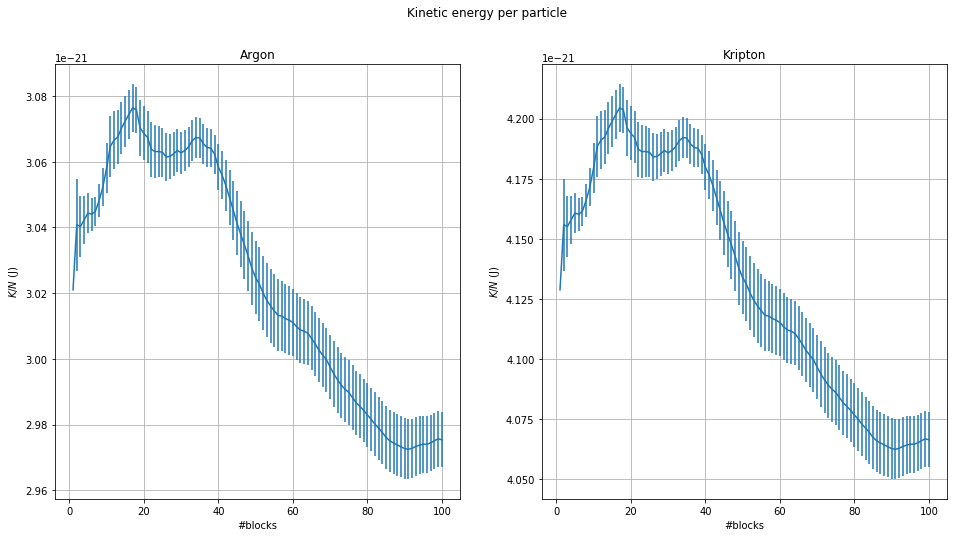

In [19]:
#Kinetic energy

Nblocks, K, errK = np.loadtxt("gasK.out", usecols=(0,2,3), unpack=True)
#Nblocks, K, errK = np.loadtxt("ave_ekin.out", usecols=(0,2,3), unpack=True)

K_Ar = K*epsAr
errK_Ar = errK*epsAr

K_Kr = K*epsKr
errK_Kr = errK*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,K_Ar, yerr=errK_Ar)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,K_Kr, yerr=errK_Kr)
plt.xlabel('#blocks')
plt.ylabel('$K/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Kinetic energy per particle')
plt.show()

#### U/N

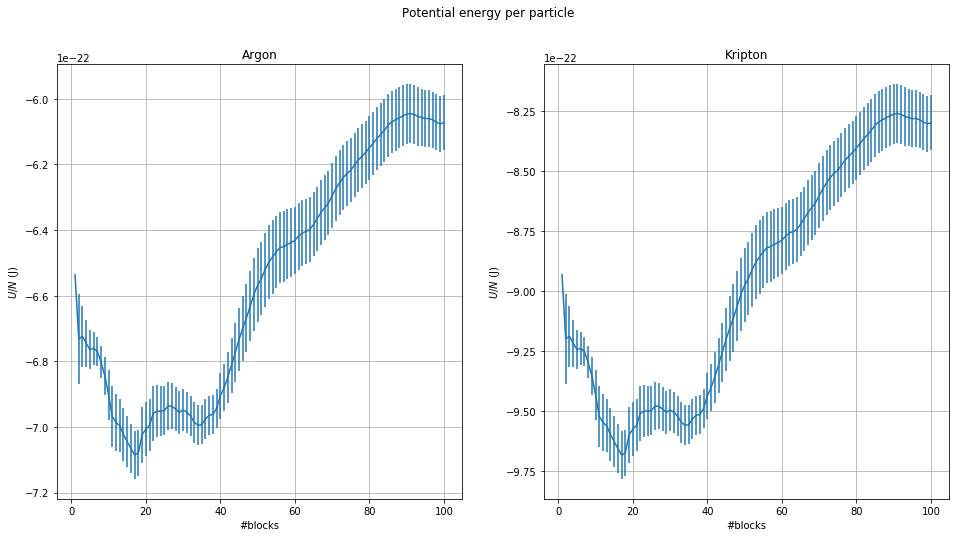

In [20]:
#Potential energy

Nblocks, U, errU = np.loadtxt("gasU.out", usecols=(0,2,3), unpack=True)
#Nblocks, U, errU = np.loadtxt("ave_epot.out", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### E/N

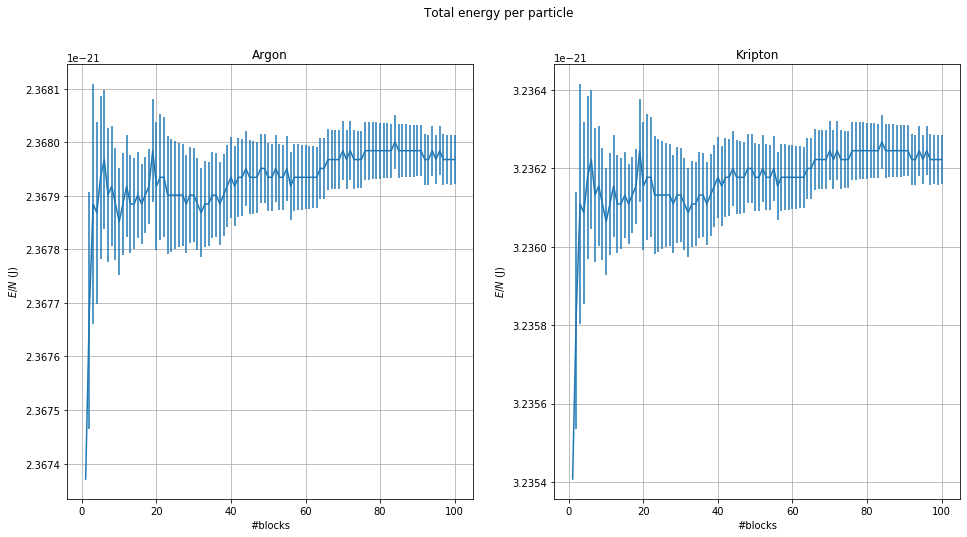

In [21]:
#Total energy

Nblocks, E, errE = np.loadtxt("gasE.out", usecols=(0,2,3), unpack=True)
#Nblocks, E, errE = np.loadtxt("ave_etot.out", usecols=(0,2,3), unpack=True)

E_Ar = E*epsAr
errE_Ar = errE*epsAr

E_Kr = E*epsKr
errE_Kr = errE*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,E_Ar, yerr=errE_Ar)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,E_Kr, yerr=errE_Kr)
plt.xlabel('#blocks')
plt.ylabel('$E/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Total energy per particle')
plt.show()

#### T

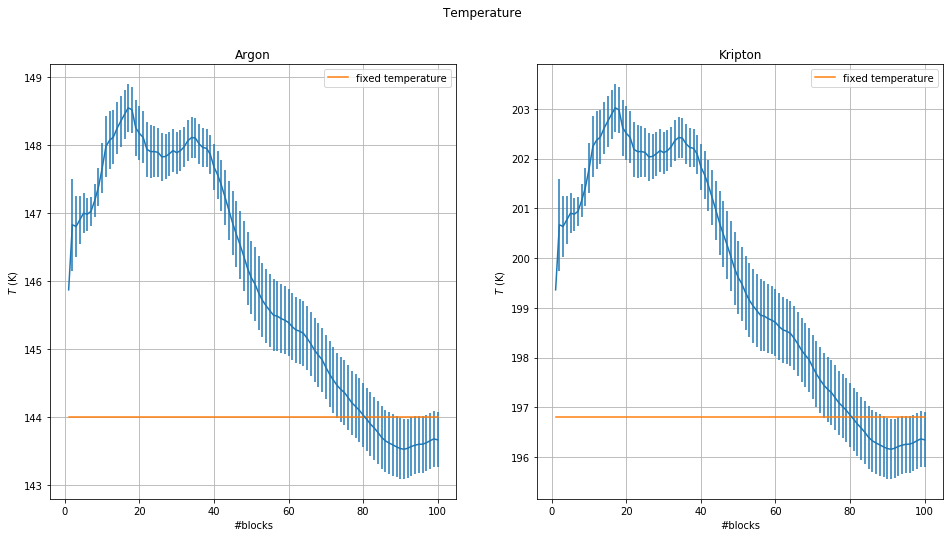

In [22]:
#Temperature

Nblocks, T, errT = np.loadtxt("gasT.out", usecols=(0,2,3), unpack=True)
#Nblocks, T, errT = np.loadtxt("ave_temp.out", usecols=(0,2,3), unpack=True)

T_Ar = T*epsAr/kb
errT_Ar = errT*epsAr/kb

T_Kr = T*epsKr/kb
errT_Kr = errT*epsKr/kb

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,T_Ar, yerr=errT_Ar)
plt.plot(Nblocks, np.array([1.2*epsAr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,T_Kr, yerr=errT_Kr)
plt.plot(Nblocks, np.array([1.2*epsKr/kb for i in range(len(Nblocks))]), label='fixed temperature')
plt.legend()
plt.xlabel('#blocks')
plt.ylabel('$T$ (K)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Temperature')
plt.show()

#### P

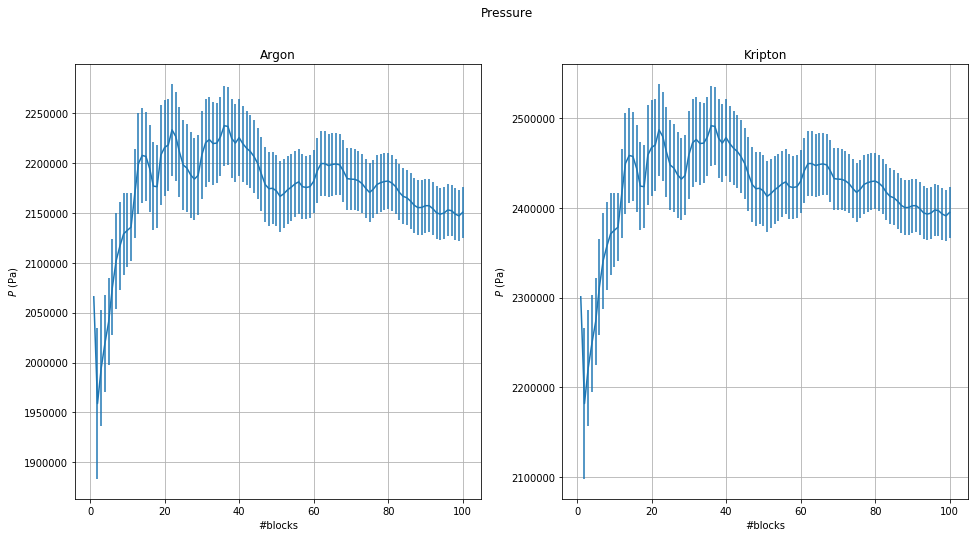

In [23]:
#Pressure

Nblocks, P, errP = np.loadtxt("gasP.out", usecols=(0,2,3), unpack=True)
#Nblocks, P, errP = np.loadtxt("ave_pres.out", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()